# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
labels = pd.read_csv('/content/drive/MyDrive/AI and Machine Learning/Project 5/Labels.csv')
images = np.load('/content/drive/MyDrive/AI and Machine Learning/Project 5/images.npy')

## Data Overview

### Understand the shape of the dataset

In [ ]:
print(f'Shape of the images is {images.shape}')
print(f'Shape of the labels is {labels.shape}')

Shape of the images is (4750, 128, 128, 3)
Shape of the labels is (4750, 1)


## Exploratory Data Analysis

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Checking with using bar plots)

array([[[ 35,  52,  78],
        [ 36,  49,  76],
        [ 31,  45,  69],
        ...,
        [ 78,  95, 114],
        [ 76,  93, 110],
        [ 80,  95, 109]],

       [[ 33,  46,  68],
        [ 37,  50,  73],
        [ 48,  65,  83],
        ...,
        [ 81,  96, 113],
        [ 74,  89, 105],
        [ 83,  95, 109]],

       [[ 34,  50,  68],
        [ 35,  52,  72],
        [ 70,  85, 101],
        ...,
        [ 83,  97, 112],
        [ 79,  94, 108],
        [ 79,  94, 107]],

       ...,

       [[ 35,  50,  69],
        [ 42,  57,  73],
        [ 42,  57,  72],
        ...,
        [ 60,  76,  92],
        [ 67,  81,  97],
        [ 64,  77,  95]],

       [[ 36,  52,  67],
        [ 48,  63,  78],
        [ 41,  57,  73],
        ...,
        [ 44,  66,  83],
        [ 58,  76,  91],
        [ 57,  74,  90]],

       [[ 44,  58,  70],
        [ 43,  57,  73],
        [ 40,  55,  72],
        ...,
        [ 41,  70,  92],
        [ 55,  78,  97],
        [ 61,  79,  96]]], dtype=uint8)
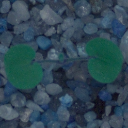

In [ ]:
#Check one sample image to see the clarity
images[0]

In [ ]:
#Check the labels data
labels.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [ ]:
def sample_images(images,labels):
  num_classes=10                                                                 # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

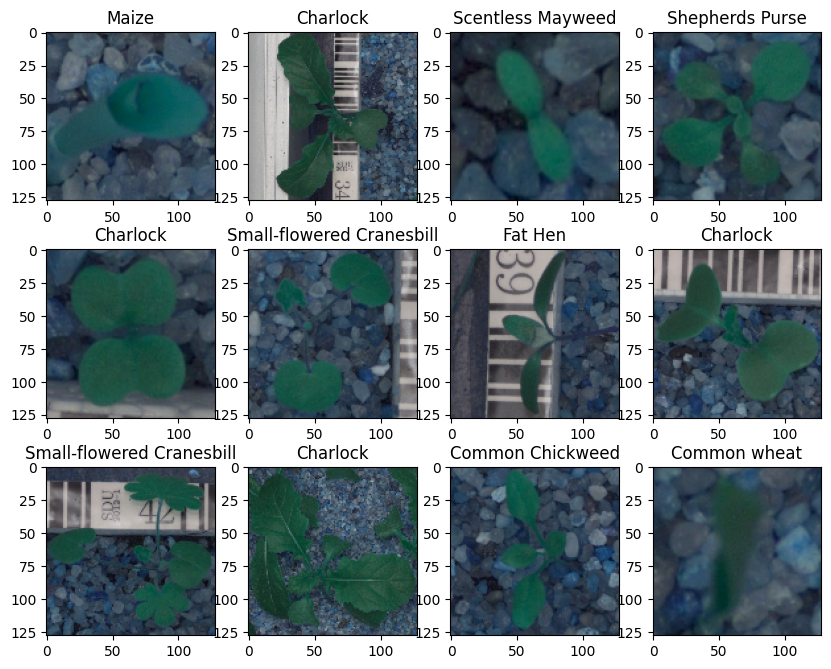

In [ ]:
sample_images(images,labels)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

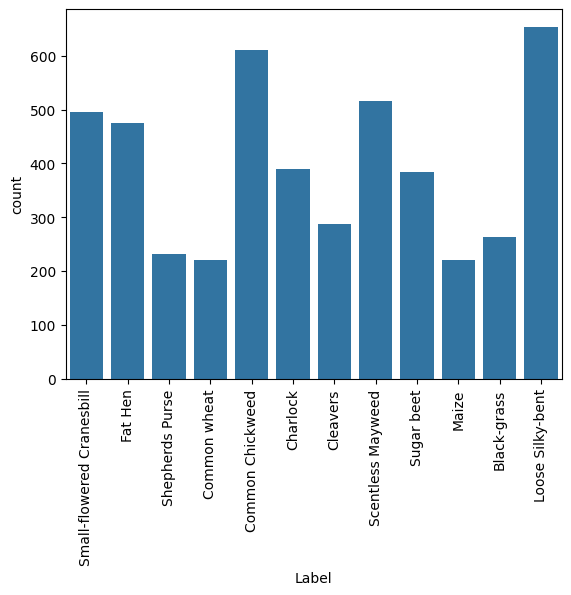

In [ ]:
#Checking counts of all the categories for any imbalances in the target variable
sns.countplot(x=labels['Label'])
plt.xticks(rotation='vertical')

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

array([[[ 78,  52,  35],
        [ 76,  49,  36],
        [ 69,  45,  31],
        ...,
        [114,  95,  78],
        [110,  93,  76],
        [109,  95,  80]],

       [[ 68,  46,  33],
        [ 73,  50,  37],
        [ 83,  65,  48],
        ...,
        [113,  96,  81],
        [105,  89,  74],
        [109,  95,  83]],

       [[ 68,  50,  34],
        [ 72,  52,  35],
        [101,  85,  70],
        ...,
        [112,  97,  83],
        [108,  94,  79],
        [107,  94,  79]],

       ...,

       [[ 69,  50,  35],
        [ 73,  57,  42],
        [ 72,  57,  42],
        ...,
        [ 92,  76,  60],
        [ 97,  81,  67],
        [ 95,  77,  64]],

       [[ 67,  52,  36],
        [ 78,  63,  48],
        [ 73,  57,  41],
        ...,
        [ 83,  66,  44],
        [ 91,  76,  58],
        [ 90,  74,  57]],

       [[ 70,  58,  44],
        [ 73,  57,  43],
        [ 72,  55,  40],
        ...,
        [ 92,  70,  41],
        [ 97,  78,  55],
        [ 96,  79,  61]]], dtype=uint8)
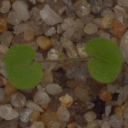

In [ ]:
#Check sample image after BGR to RGB conversion
images[0]

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
images_resized = []
height = 64
width = 64
dimensions = (width,height)
for i in range(len(images)):
  images_resized.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

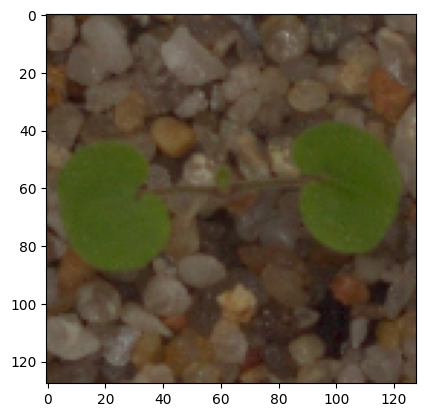

In [ ]:
#Check sample image before resizing dimensions
plt.imshow(images[0])

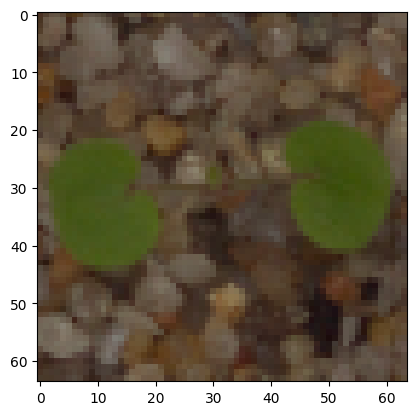

In [ ]:
#Check sample image after resizing dimensions
plt.imshow(images_resized[0])

### Data Preparation for Modeling

**Split the dataset**

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_resized), labels, test_size=0.1, stratify = labels, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, stratify = y_temp, random_state=1)

In [ ]:
#Check shape of train, validation and test datasets

print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


### Encode the target labels

In [ ]:
# Convert labels from names to one hot vectors.
# Labelbinarizer works similar to onehotencoder

enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

In [ ]:
y_train_encoded.shape,y_val_encoded.shape,y_test_encoded.shape

((3847, 12), (428, 12), (475, 12))

### Data Normalization

Image pixel values are 0 to 255. We have to normalize these values by dividing them by 255 to standardize and have values betwen 0 to 1.

**Advantage**:
Normalizing pixel values by dividing by 255 scales them to the range [0, 1], enhancing numerical stability and convergence during optimization. It ensures uniform scaling across images, accelerating learning and improving generalization performance. Additionally, it facilitates compatibility with activation functions, contributing to smoother optimization and regularization effects.

In [ ]:
# Normalizing the image pixels of train, test and validation data
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

In [ ]:
# Clearing session
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Intializing a sequential model
model_1 = Sequential()

# First convolutional layer
model_1.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Maxpooling Layer
model_1.add(MaxPooling2D((2, 2), padding = 'same'))

# Creating two similar convolution and max-pooling layers activation = relu
model_1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_1.add(MaxPooling2D((2, 2), padding = 'same'))

model_1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_1.add(MaxPooling2D((2, 2), padding = 'same'))

# Flattening the layer to be available for ANN
model_1.add(Flatten())

# Fully connected dense layer with 16 neurons
model_1.add(Dense(16, activation='relu'))
model_1.add(Dropout(0.3))

# Adding output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_1.add(Dense(12, activation='softmax'))

#Adam Optimizer and loss function
opt=Adam()
loss = 'categorical_crossentropy'

# compiling
model_1.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

# Model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0

In [ ]:
# Model fitting
history_1 = model_1.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 7s - loss: 2.4237 - accuracy: 0.1580 - val_loss: 2.2767 - val_accuracy: 0.2617 - 7s/epoch - 54ms/step
Epoch 2/30
121/121 - 1s - loss: 2.2253 - accuracy: 0.2696 - val_loss: 2.0814 - val_accuracy: 0.3411 - 1s/epoch - 12ms/step
Epoch 3/30
121/121 - 2s - loss: 2.1061 - accuracy: 0.2917 - val_loss: 1.9200 - val_accuracy: 0.4065 - 2s/epoch - 15ms/step
Epoch 4/30
121/121 - 2s - loss: 1.9281 - accuracy: 0.3369 - val_loss: 1.7268 - val_accuracy: 0.4112 - 2s/epoch - 14ms/step
Epoch 5/30
121/121 - 2s - loss: 1.8142 - accuracy: 0.3647 - val_loss: 1.7858 - val_accuracy: 0.3621 - 2s/epoch - 13ms/step
Epoch 6/30
121/121 - 2s - loss: 1.6870 - accuracy: 0.3769 - val_loss: 1.4912 - val_accuracy: 0.5070 - 2s/epoch - 15ms/step
Epoch 7/30
121/121 - 2s - loss: 1.6024 - accuracy: 0.3993 - val_loss: 1.3824 - val_accuracy: 0.5350 - 2s/epoch - 16ms/step
Epoch 8/30
121/121 - 3s - loss: 1.5173 - accuracy: 0.4393 - val_loss: 1.2864 - val_accuracy: 0.6005 - 3s/epoch - 22ms/step
Epoch 9/30
121/1

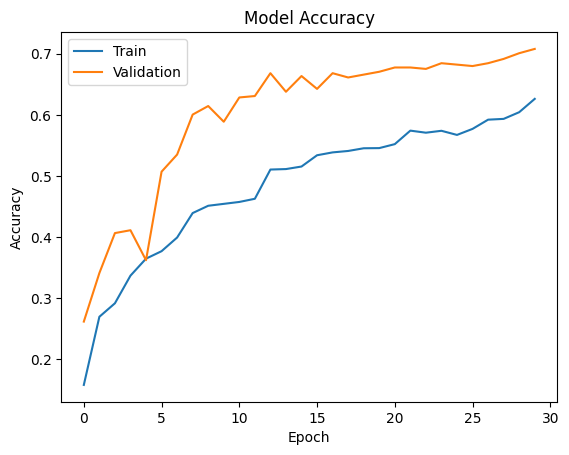

In [ ]:
#Model Evaluation
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
#Model evaluation on test data
accuracy = model_1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.9247 - accuracy: 0.6947 - 89ms/epoch - 6ms/step


**Confusion Matrix**

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model_1.predict(X_test_normalized)

15/15 [==============================] - 0s 4ms/step


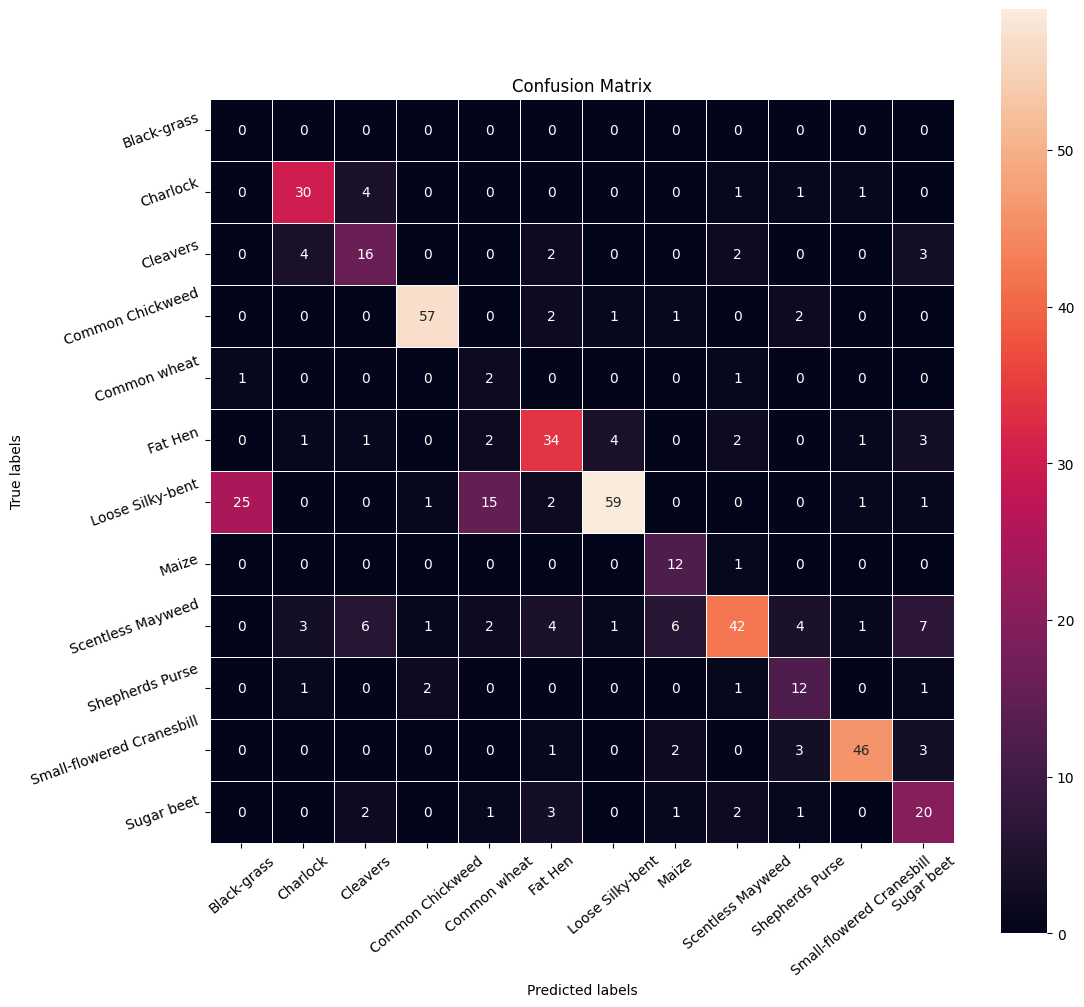

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_pred_arg,y_test_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

## **Observations**:
There significant number of mis classification from this model. Accuracy is not very good.

**For example:** Black grass is not once classified correctly and miss-classified as a loose silky bent many times

In [ ]:
# Plotting the classification report
cr=classification_report(y_pred_arg,y_test_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.77      0.81      0.79        37
           2       0.55      0.59      0.57        27
           3       0.93      0.90      0.92        63
           4       0.09      0.50      0.15         4
           5       0.71      0.71      0.71        48
           6       0.91      0.57      0.70       104
           7       0.55      0.92      0.69        13
           8       0.81      0.55      0.65        77
           9       0.52      0.71      0.60        17
          10       0.92      0.84      0.88        55
          11       0.53      0.67      0.59        30

    accuracy                           0.69       475
   macro avg       0.61      0.65      0.60       475
weighted avg       0.79      0.69      0.73       475



## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [ ]:
# Monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# This configuration will allow the ImageDataGenerator to randomly rotate the input images within the range of -20 to +20 degrees during data augmentation.
#The fill_mode='nearest' parameter specifies the method used to fill in newly created pixels during rotation or other transformations.
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

In [ ]:
# Intializing a sequential model
model_2 = Sequential()

# First convolutional layer
model_2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Maxpooling Layer
model_2.add(MaxPooling2D((2, 2), padding = 'same'))

# second concolutional and maxpooling layers also with batch normalization
model_2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_2.add(MaxPooling2D((2, 2), padding = 'same'))
model_2.add(BatchNormalization())

# Flattening the layer to be available for ANN
model_2.add(Flatten())

# Fully connected dense layer with 16 neurons
model_2.add(Dense(16, activation='relu'))
model_2.add(Dropout(0.3))

# Adding output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_2.add(Dense(12, activation='softmax'))

#Adam Optimizer and loss function
opt=Adam()
loss = 'categorical_crossentropy'

# compiling
model_2.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

# Model summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                        

In [ ]:
# Fitting the model on train data with batch_size=64 and epochs=30
epochs = 30
batch_size = 64

history_2 = model_2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       shuffle=False),
                                       epochs=epochs,
                                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/30
60/60 [==============================] - 6s 77ms/step - loss: 2.1697 - accuracy: 0.2524 - val_loss: 2.3808 - val_accuracy: 0.4603 - lr: 0.0010
Epoch 2/30
60/60 [==============================] - 5s 83ms/step - loss: 1.7502 - accuracy: 0.3936 - val_loss: 2.2810 - val_accuracy: 0.3808 - lr: 0.0010
Epoch 3/30
60/60 [==============================] - 5s 80ms/step - loss: 1.5415 - accuracy: 0.4644 - val_loss: 2.1634 - val_accuracy: 0.3014 - lr: 0.0010
Epoch 4/30
60/60 [==============================] - 6s 91ms/step - loss: 1.4053 - accuracy: 0.4975 - val_loss: 2.0901 - val_accuracy: 0.4813 - lr: 0.0010
Epoch 5/30
60/60 [==============================] - 4s 73ms/step - loss: 1.3117 - accuracy: 0.5311 - val_loss: 1.9121 - val_accuracy: 0.4276 - lr: 0.0010
Epoch 6/30
60/60 [==============================] - 6s 102ms/step - loss: 1.2283 - accuracy: 0.5652 - val_loss: 1.7352 - val_accuracy: 0.5467 - lr: 0.0010
Epoch 7/30
60/60 [==============================] - 4s 74ms/step - loss: 1.

**Model Evaluation**

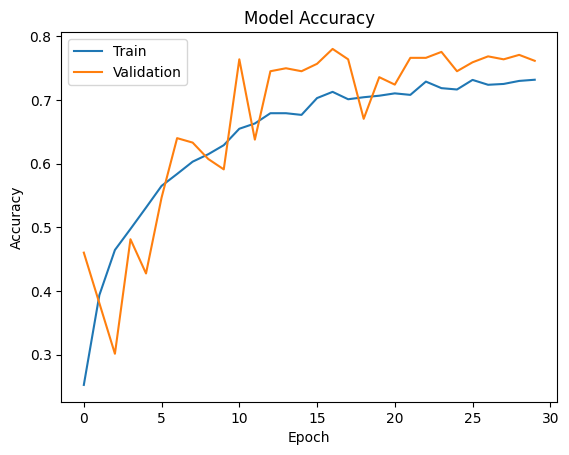

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Test data evaluation**

In [ ]:
accuracy = model_2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.6877 - accuracy: 0.7789 - 67ms/epoch - 4ms/step


**Confusion Matrix**

In [ ]:
y_pred=model_2.predict(X_test_normalized)

15/15 [==============================] - 0s 2ms/step


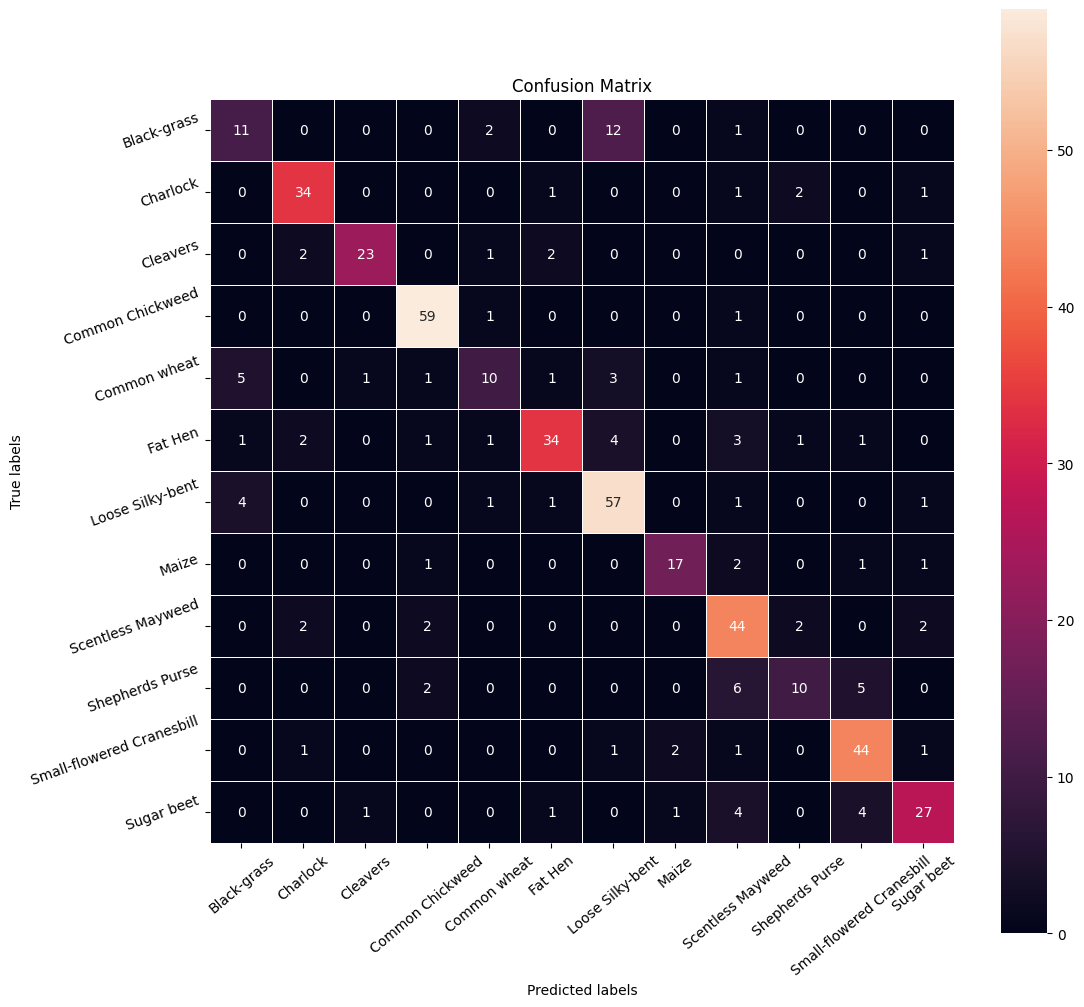

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

## **Observations**:
Classifications improved compared to model_1 after performing data augmentation.

**For example:** Black grass classification improved and getting miss-classified very few times

In [ ]:
#Classification report
cr=classification_report(y_pred_arg,y_test_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.42      0.52      0.47        21
           1       0.87      0.83      0.85        41
           2       0.79      0.92      0.85        25
           3       0.97      0.89      0.93        66
           4       0.45      0.62      0.53        16
           5       0.71      0.85      0.77        40
           6       0.88      0.74      0.80        77
           7       0.77      0.85      0.81        20
           8       0.85      0.68      0.75        65
           9       0.43      0.67      0.53        15
          10       0.88      0.80      0.84        55
          11       0.71      0.79      0.75        34

    accuracy                           0.78       475
   macro avg       0.73      0.76      0.74       475
weighted avg       0.80      0.78      0.79       475



Accuracy metrics improved significantly for model_2 as we can see for class 0 and class 4.

## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

**model_2** with data augmentation is a better model because of improve on the accuracy metric and reduce in the loss metric. Though model_2 is not the ideal one but it is the best model at hand. So choosing model_2 as a final model.

### Visualizing the prediction

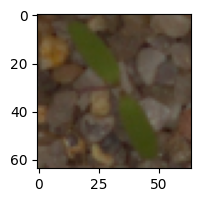

1/1 [==============================] - 0s 19ms/step
Predicted Label ['Fat Hen']
True Label Fat Hen


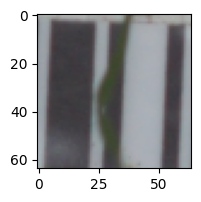

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Loose Silky-bent']
True Label Black-grass


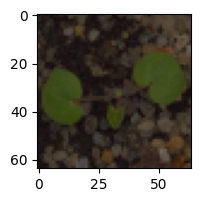

1/1 [==============================] - 0s 26ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


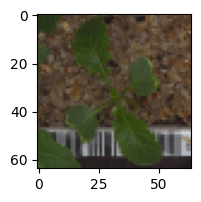

1/1 [==============================] - 0s 26ms/step
Predicted Label ['Charlock']
True Label Charlock


In [ ]:

# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()

print('Predicted Label', enc.inverse_transform(model_2.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()

print('Predicted Label', enc.inverse_transform(model_2.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()

print('Predicted Label', enc.inverse_transform(model_2.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()

print('Predicted Label', enc.inverse_transform(model_2.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])

As we can see in the above visualizations how the model is predicting the plants. Though the model is not perfect it is predicting pretty good most of the times

## Actionable Insights and Business Recommendations

**Transfer Learning:**
Utilize transfer learning by initializing a pre-trained CNN model with weights learned from a large-scale dataset like ImageNet. Fine-tune the model on the plant seedling dataset to adapt it to the specific characteristics of the target domain. Experiment with different pre-trained architectures such as VGG, ResNet, or MobileNet to find the most suitable model for the classification task.

**Collaboration and Domain Expertise:**
Foster collaboration between data scientists and domain experts in botany or agriculture to leverage domain knowledge and insights. Incorporate feedback from domain experts during model development and validation to enhance the model's effectiveness in real-world scenarios.

**Data Preprocessing and Augmentation:**
Conduct comprehensive data preprocessing, including resizing, normalization, and augmentation, to enhance the diversity and quality of the training dataset. Implement techniques like rotation, flipping, and brightness adjustment to augment the dataset and improve the model's robustness to variations in plant seedling images.

**Model Selection and Architecture Design:**
Choose an appropriate pre-trained CNN architecture based on the complexity of the classification task and computational resources available. Experiment with different architectures and fine-tune hyperparameters to optimize model performance. Consider factors such as accuracy, computational efficiency, and model interpretability when selecting the final architecture.


**Interpretability and Explainability:**
Enhance the interpretability of the model by visualizing learned features and activation maps, enabling stakeholders to understand the decision-making process. Provide explanations for model predictions, especially in critical applications where trust and transparency are paramount.

**Continuous Monitoring and Maintenance:**
Establish a system for continuous monitoring of the deployed model's performance in production. Regularly retrain the model with new data to ensure its accuracy and relevance over time, considering seasonal variations and changes in environmental conditions.


**Ethical Considerations:**
Address ethical considerations such as bias, fairness, and privacy throughout the project lifecycle. Ensure transparency and accountability in model development and deployment, and mitigate any potential risks associated with automated decision-making in agricultural contexts.

By following these recommendations, a robust and accurate CNN-based classification system can be developed that meets both business objectives and ethical considerations.

_____